In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

In [21]:
pulls = pd.read_csv('/Users/mishudhar/Downloads/pulls.csv')
pull_files = pd.read_csv('/Users/mishudhar/Downloads/pull_files.csv')

In [22]:
pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [23]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [24]:
# Converting the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

In [25]:
pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


# Merging two dataFrames

In [26]:
data = pulls.merge(pull_files, on = 'pid')

In [29]:


#Crate a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year

data['year'] = data['date'].dt.year

In [30]:
data.head()

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018


In [31]:
data.shape

(85588, 6)

In [92]:
%matplotlib inline
# Group by month and year and count the pull requests
counts = data.groupby(['year', 'month'])['pid'].count()
counts

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64

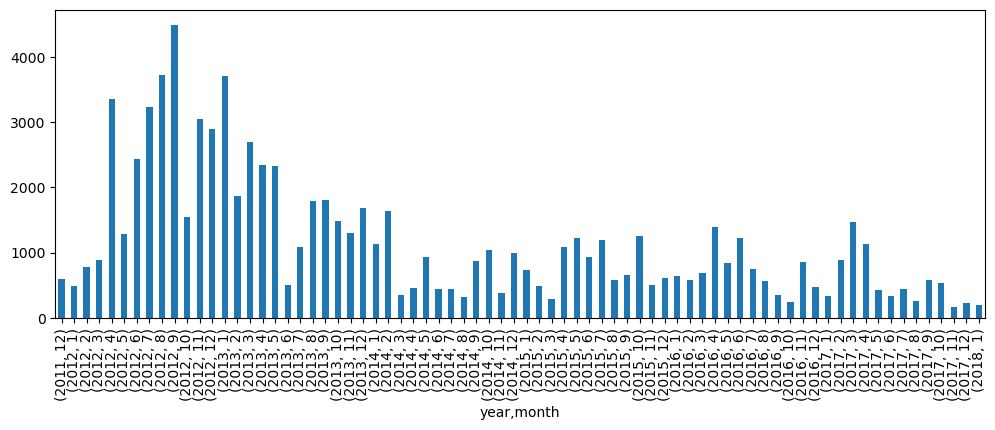

In [41]:
counts.plot(kind = 'bar', figsize = (12,4))
plt.show()

In [44]:
import plotly.express as px
Counts = counts.reset_index()
Counts

#fig = px.bar(counts, x= counts.index, y='pid', title='Counts by Year and Month')
#fig.show()

,year,month,pid
0,2011,12,590
1,2012,1,489
2,2012,2,787
3,2012,3,880
4,2012,4,3354
...,...,...,...
69,2017,9,578
70,2017,10,535
71,2017,11,172
72,2017,12,224


In [53]:
fig = px.bar(Counts, x='year', y='pid', color='month', title='Counts by Year and Month', log_y = True, log_x = True)
fig.show()

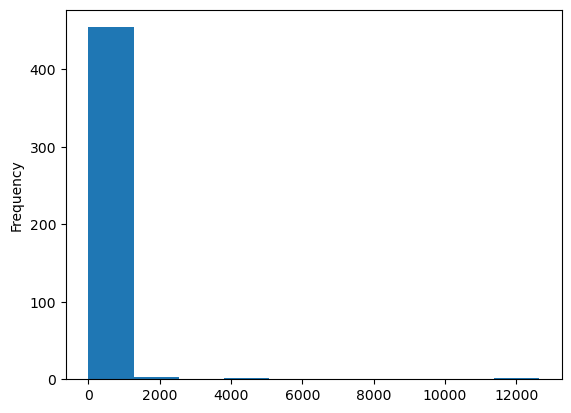

In [63]:
%matplotlib inline
# grpuping the pull request by each user (submitter)
by_user = data.groupby('user')['pid'].count()
by_user.plot(kind = 'hist')
plt.show()

In [67]:
by_user

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64

In [66]:
By_user = data.groupby('user').agg({'pid':'count'})
By_user

,pid
user,
0xmohit,2
193s,4
2m,20
4.00E+06,22
AlexeyIvanov8,2
...,...
yinxusen,1
yllan,4
ziggystar,22


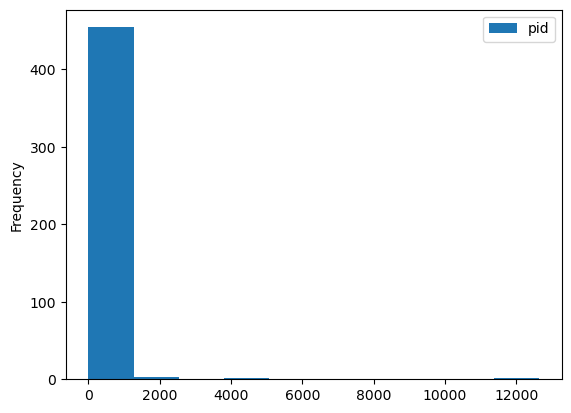

In [69]:
By_user.plot(kind = 'hist')
plt.show()

In [70]:
data.nlargest(10, 'pid')

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java,1,2018
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala,1,2018
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala,1,2018
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...,1,2018
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....,1,2018


In [73]:
# Identifying the last ten pull request(pid)
last_10 = pulls.sort_values(by = 'date').tail(10)
last_10

,pid,user,date
9,162011899,joroKr21,2018-01-10 00:45:57+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
0,163314316,hrhino,2018-01-16 23:29:16+00:00


In [93]:
# Merging the last ten pull requests with pull files
joined_pr = pull_files.merge(last_10, on = 'pid')
# Identifying the unique files
files = set(joined_pr['file'])

In [94]:
joined_pr.head()

,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00


In [76]:
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [83]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
filed_pr = data[data['file'] == 'src/compiler/scala/reflect/reify/phases/Calculate.scala']

In [85]:
author_counts = filed_pr.groupby('user').count()
author_counts

,pid,date,file,month,year
user,,,,,
bjornregnell,1,1,1,1,1
densh,1,1,1,1,1
gkossakowski,1,1,1,1,1
melloc,1,1,1,1,1
odersky,2,2,2,2,2
paulp,2,2,2,2,2
retronym,5,5,5,5,5
soc,4,4,4,4,4
starblood,1,1,1,1,1


In [86]:
# Top three developers
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


In [87]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [89]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = pull_files[pull_files['file'] == file]
file_pr

,pid,file
13,162838837,src/compiler/scala/reflect/reify/phases/Calcul...
26951,22845163,src/compiler/scala/reflect/reify/phases/Calcul...
32753,12102550,src/compiler/scala/reflect/reify/phases/Calcul...
35420,10587633,src/compiler/scala/reflect/reify/phases/Calcul...
46700,5320191,src/compiler/scala/reflect/reify/phases/Calcul...
47009,5291974,src/compiler/scala/reflect/reify/phases/Calcul...
47567,5050360,src/compiler/scala/reflect/reify/phases/Calcul...
47965,5026775,src/compiler/scala/reflect/reify/phases/Calcul...
49156,4786005,src/compiler/scala/reflect/reify/phases/Calcul...
51313,4295399,src/compiler/scala/reflect/reify/phases/Calcul...


In [96]:
joined_pr = pulls.merge(file_pr, on = 'pid')
joined_pr.head()

,pid,user,date,file
0,162838837,zuvizudar,2018-01-14 19:16:16+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
1,22845163,retronym,2014-10-16 10:23:42+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
2,12102550,xeno-by,2014-02-01 01:19:58+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
3,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
4,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...


In [98]:
# find the users of the last ten most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

          pid user                      date
745  93445328  soc 2016-11-12 17:21:25+00:00
746  93444157  soc 2016-11-12 16:40:31+00:00
747  93443506  soc 2016-11-12 16:17:08+00:00
751  92879715  soc 2016-11-08 23:22:27+00:00
752  92878932  soc 2016-11-08 23:16:14+00:00
       user  date  pid
0       soc  2011   12
1       soc  2012   44
2       soc  2013  117
3       soc  2014   20
4       soc  2015   24
5       soc  2016   21
6   xeno-by  2011   20
7   xeno-by  2012  271
8   xeno-by  2013  123
9   xeno-by  2014   60
10  xeno-by  2015    3
user  soc  xeno-by
date              
2011   12       20
2012   44      271
2013  117      123
2014   20       60
2015   24        3
2016   21        0


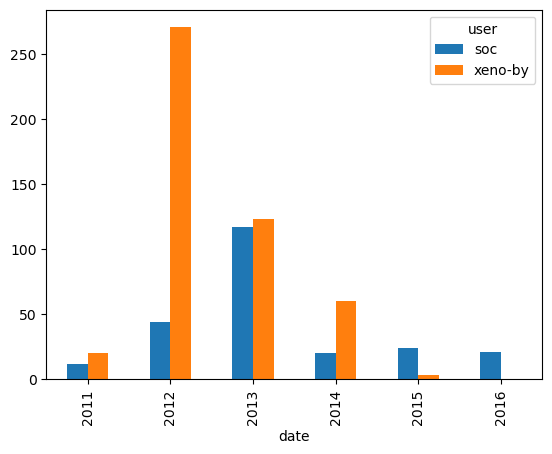

In [106]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')
print(by_author.head())
print(counts)
print(counts_wide)

<AxesSubplot:xlabel='date'>

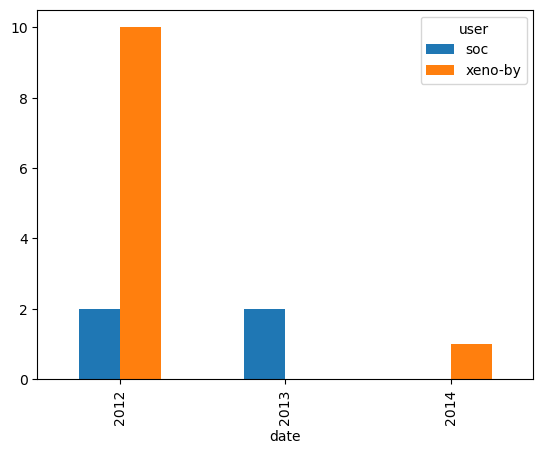

In [107]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Merge DataFrames and select the pull requests by the author
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')